In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [38]:
#Reading in data

data = pd.read_csv("Cleaning_Output")
train_X, train_Y = pd.read_csv("train_X_CUT"), pd.read_csv("train_Y_CUT")["WF9_CESD7_CUT"]
dev_X, dev_Y = pd.read_csv("dev_X_CUT"), pd.read_csv("dev_Y_CUT")["WF9_CESD7_CUT"]
test_X, test_Y = pd.read_csv("test_X_CUT"), pd.read_csv("test_Y_CUT")["WF9_CESD7_CUT"]

In [39]:
train_X.shape

(3331, 71)

### Metrics

1. TPR
2. FPR
3. Precision
4. Accuracy

In [40]:
def showmetrics(pred, true):
    cm = confusion_matrix(true, pred)
    acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
    TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
    FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
    prec = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
    f1 = 2*((prec*TPR)/(prec+TPR))

    print(cm)
    print("Model TPR: " + str(TPR))
    print("Model FPR: " + str(FPR))
    print("Model F1: " + str(f1))
    print("Model Precision: " + str(prec))
    print("Model Accuracy: " + str(acc))
    return acc, TPR, FPR, f1, prec

## Baseline

In [41]:
model = LogisticRegression()
model.fit(train_X, train_Y)

pred_base = [0 for x in model.predict(test_X)]

showmetrics(pred_base, test_Y)

[[386   0]
 [ 30   0]]
Model TPR: 0.0
Model FPR: 0.0
Model F1: nan
Model Precision: nan
Model Accuracy: 0.9278846153846154


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/tmp/ipykernel_30/2601468214.py:6: RuntimeWarning:

invalid value encountered in long_scalars



(0.9278846153846154, 0.0, 0.0, nan, nan)

## Training Model

In [42]:
train_X = sm.add_constant(train_X)
dev_X = sm.add_constant(dev_X)

In [43]:
model = sm.Logit(train_Y, train_X).fit()

         Current function value: 0.233971
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          WF9_CESD7_CUT   No. Observations:                 3331
Model:                          Logit   Df Residuals:                     3259
Method:                           MLE   Df Model:                           71
Date:                Thu, 04 May 2023   Pseudo R-squ.:                  0.1831
Time:                        21:47:27   Log-Likelihood:                -779.36
converged:                      False   LL-Null:                       -954.05
Covariance Type:            nonrobust   LLR p-value:                 2.209e-38
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.2943      1.030     -7.082      0.000      -9.313      -5.276
WF9_WORK_YRS                          -0.0703      0.022     -3.269      0.001      -0.112      -0.028
WF9_CAREER_EXPERIENCE                  0.0055      0.054      0.102      0.919      -0.101       0.112
WF9_CHAR_EDUC                         -0.0653      0.056     -1.160      0.246      -0.176       0.045
WF9_A19_HRS_SKILLS                    -0.0471      0.056     -0.845      0.398      -0.156       0.062
WF9_WORK_HRS_CAT                       0.0396      0.050      0.792      0.428      -0.058       0.138
WF9_WORK_MONTHS                        0.0169      0.025      0.665      0.506      -0.033       0.067
WF9_WORK_BEHAVIOR                      0.5724      0.105      5.461      0.000       0.367       0.778
WF9_WORK_HELP_AVAILABLE                0.2001      0.072      2.774      0.006       0.059       0.342
WF9_WORK_RESPECT                       0.4466      0.072      6.178      0.000       0.305       0.588
WF9_CHAR_HHINCOME                     -0.0757      0.062     -1.218      0.223      -0.198       0.046
WF9_WORK_PRNTS_TALK                    0.3518      0.101      3.489      0.000       0.154       0.550
WF9_ATTITUDES_PMS_PROG                 0.1141      0.029      4.000      0.000       0.058       0.170
WF9_CL6A_B_PRCNT_CHCLASS_BLACK        -0.0053      0.003     -1.817      0.069      -0.011       0.000
WF9_WORK_BGCHK_EASY                    0.1140      0.083      1.366      0.172      -0.050       0.278
WF9_WORK_YRS_999                     -16.7791   6306.559     -0.003      0.998   -1.24e+04    1.23e+04
WF9_CAREER_EXPERIENCE_999              1.5749      0.681      2.312      0.021       0.240       2.910
WF9_CHAR_EDUC_999                    -14.6527   1467.945     -0.010      0.992   -2891.773    2862.467
WF9_A19_HRS_SKILLS_999                -0.4274      0.851     -0.502      0.616      -2.096       1.241
WF9_WORK_HRS_CAT_999                   1.8715      1.173      1.596      0.110      -0.427       4.170
WF9_WORK_MONTHS_999                   -0.3147      0.855     -0.368      0.713      -1.990       1.360
WF9_WORK_BEHAVIOR_999                  1.9307      0.793      2.434      0.015       0.376       3.486
WF9_WORK_HELP_AVAILABLE_999          -13.5564   1085.433     -0.012      0.990   -2140.966    2113.853
WF9_WORK_RESPECT_999                 -22.8995   2.95e+05  -7.76e-05      1.000   -5.79e+05    5.79e+05
WF9_CHAR_HHINCOME_999                 -0.4110      0.374     -1.099      0.272      -1.144       0.322
WF9_CL6A_B_PRCNT_CHCLASS_BLACK_999    -0.2502      0.198     -1.266      0.205      -0.638       0.137
WF9_WORK_BGCHK_EASY_999                0.1936      0.540      0.359      0.720      -0.865       1.252
WF9_CHAR_RACE_2                        0.1187      0.207      0.573      0.567      -0.287       0.524
WF9_CHAR_RACE_3                        0.1645   

In [45]:
pred = [1 if x == True else 0 for x in model.predict(dev_X) > 0.5]

In [46]:
acc1, TPR1, FPR1, f1_1, prec1 = showmetrics(pred, dev_Y)

[[374   2]
 [ 38   3]]
Model TPR: 0.07317073170731707
Model FPR: 0.005319148936170213
Model F1: 0.13043478260869565
Model Precision: 0.6
Model Accuracy: 0.9040767386091128


# VIF

In [47]:
vif_drop = train_X

In [48]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_drop.columns

In [49]:
vif_data["VIF"] = [variance_inflation_factor(vif_drop.values, i)
                          for i in range(len(vif_drop.columns))]
vif_data.head(60)

,feature,VIF
0,const,203.288118
1,WF9_WORK_YRS,1.669649
2,WF9_CAREER_EXPERIENCE,1.731379
3,WF9_CHAR_EDUC,1.409241
4,WF9_A19_HRS_SKILLS,1.295134
5,WF9_WORK_HRS_CAT,1.230536
6,WF9_WORK_MONTHS,1.403114
7,WF9_WORK_BEHAVIOR,1.332019
8,WF9_WORK_HELP_AVAILABLE,1.506451
9,WF9_WORK_RESPECT,1.478427


## ROC Curve

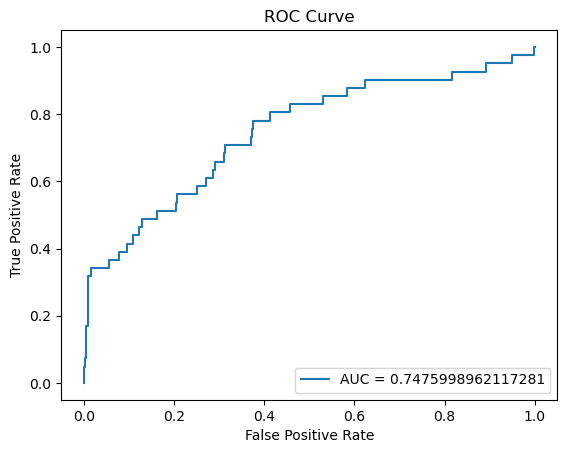

In [50]:
pred_prob = model.predict(dev_X)

fpr, tpr, proba = roc_curve(dev_Y, pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(dev_Y, pred_prob)}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

## Predictions With "Optimal" Threshold

In [51]:
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), proba)), key=lambda i: i[0], reverse=True)[0][1]
optimal_proba_cutoff

0.05884281922794896

In [52]:
pred = [1 if x == True else 0 for x in model.predict(dev_X) > 0.052669540097475515]

In [53]:
acc2, TPR2, FPR2, f1_2, prec2 = showmetrics(pred, dev_Y)

[[220 156]
 [  8  33]]
Model TPR: 0.8048780487804879
Model FPR: 0.4148936170212766
Model F1: 0.28695652173913044
Model Precision: 0.1746031746031746
Model Accuracy: 0.6067146282973621


## Predictions with Threshold = 0.2

In [54]:
pred = [1 if x == True else 0 for x in model.predict(dev_X) > 0.2]

In [55]:
acc3, TPR3, FPR3,f1_3, prec3 = showmetrics(pred, dev_Y)

[[355  21]
 [ 27  14]]
Model TPR: 0.34146341463414637
Model FPR: 0.05585106382978723
Model F1: 0.368421052631579
Model Precision: 0.4
Model Accuracy: 0.8848920863309353


# Predictions on Test Data

In [56]:
test_X, test_Y = pd.read_csv("test_X_CUT"), pd.read_csv("test_Y_CUT")["WF9_CESD7_CUT"]
test_X = sm.add_constant(test_X)

In [57]:
pred = [1 if x == True else 0 for x in model.predict(test_X) > 0.5]

In [58]:
acc_t_1, TPR_t_1, FPR_t_1 ,f1_t_1, prec_t_1 = showmetrics(pred, test_Y)

[[384   2]
 [ 28   2]]
Model TPR: 0.06666666666666667
Model FPR: 0.0051813471502590676
Model F1: 0.11764705882352941
Model Precision: 0.5
Model Accuracy: 0.9278846153846154


In [59]:
pred = [1 if x == True else 0 for x in model.predict(test_X) > 0.1]

In [60]:
acc_t_2, TPR_t_2, FPR_t_2 ,f1_t_2, prec_t_2 = showmetrics(pred, test_Y)

[[296  90]
 [ 12  18]]
Model TPR: 0.6
Model FPR: 0.23316062176165803
Model F1: 0.2608695652173913
Model Precision: 0.16666666666666666
Model Accuracy: 0.7548076923076923


In [61]:
pred_prob = model.predict(test_X)

fpr, tpr, proba = roc_curve(test_Y, pred_prob)

fig = px.line(x=fpr, y=tpr, title=f"AUC = {roc_auc_score(test_Y, pred_prob)}")
fig.update_layout(xaxis_title = "False Positive Rate", yaxis_title ="True Positive Rate", title = "ROC Curve", width = 1000, 
                  height = 800)
fig.add_annotation(x=0.77, y=0.016,
            text=f"AUC = {roc_auc_score(test_Y, pred_prob)}",
                               showarrow=False,
    font=dict(
            size=18,
            )
        )

fig.show()

In [62]:
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), proba)), key=lambda i: i[0], reverse=True)[0][1]
optimal_proba_cutoff

0.06407859132153843

In [63]:
pred = [1 if x == True else 0 for x in model.predict(test_X) > 0.06407859132153843]

In [64]:
acc_t_3, TPR_t_3, FPR_t_3 ,f1_t_3, prec_t_3 = showmetrics(pred, test_Y)

[[248 138]
 [  8  22]]
Model TPR: 0.7333333333333333
Model FPR: 0.35751295336787564
Model F1: 0.23157894736842105
Model Precision: 0.1375
Model Accuracy: 0.6490384615384616


In [65]:
pred = [1 if x == True else 0 for x in model.predict(test_X) > 0.08]

In [66]:
acc_t_4, TPR_t_4, FPR_t_4 ,f1_t_4, prec_t_4 = showmetrics(pred, test_Y)

[[274 112]
 [ 11  19]]
Model TPR: 0.6333333333333333
Model FPR: 0.29015544041450775
Model F1: 0.23602484472049687
Model Precision: 0.1450381679389313
Model Accuracy: 0.7043269230769231


In [67]:
pred = [1 if x == True else 0 for x in model.predict(test_X) > 0.2]

In [68]:
acc_t_5, TPR_t_5, FPR_t_5 ,f1_t_5, prec_t_5 = showmetrics(pred, test_Y)

[[352  34]
 [ 24   6]]
Model TPR: 0.2
Model FPR: 0.08808290155440414
Model F1: 0.17142857142857143
Model Precision: 0.15
Model Accuracy: 0.8605769230769231


## Summary Table

In [69]:
index = ["F1", "TPR", "FPR",  "Precision", "Accuracy"]
columns = ["Baseline", "T = 0.5", "T = 0.2","T = 0.1", "T = 0.08", "T = 0.064"]
tpr = [0, TPR_t_1, TPR_t_5, TPR_t_2, TPR_t_4, TPR_t_3]
fpr = [0, FPR_t_1, TPR_t_5, FPR_t_2, FPR_t_4, FPR_t_3]
f1 = ["n/a", f1_t_1, f1_t_5, f1_t_2, f1_t_4, f1_t_3]
prec = ["n/a", prec_t_1, prec_t_5, prec_t_2, prec_t_4, prec_t_3]
acc = [.93, acc_t_1, acc_t_5, acc_t_2, acc_t_4, acc_t_3]
rows = [f1, tpr, fpr, prec, acc]

In [70]:
results = pd.DataFrame(rows, index = index, columns = columns)

In [71]:
results

,Baseline,T = 0.5,T = 0.2,T = 0.1,T = 0.08,T = 0.064
F1,n/a,0.117647,0.171429,0.260870,0.236025,0.231579
TPR,0,0.066667,0.200000,0.600000,0.633333,0.733333
FPR,0,0.005181,0.200000,0.233161,0.290155,0.357513
Precision,n/a,0.500000,0.150000,0.166667,0.145038,0.137500
Accuracy,0.93,0.927885,0.860577,0.754808,0.704327,0.649038


In [72]:
results.to_csv("LogisticRegressionResults.csv")